# <p align="center">Proyecto tema 3</p>

#### <p align="center">En este proyecto hicimos web scrapping a un sitio web llamado SOFIFA, este sitio tiene informacion sobre futbolistas actual, y rescatamos la informacion mas relevante para posteriormente crear graficas que representen esta informacion</p>

##### <p align="center"> Integrantes: <br> Miguel Payan <br> Carlos Guardado <br> Martin Garcia <br> Joel Gonzalez<p>

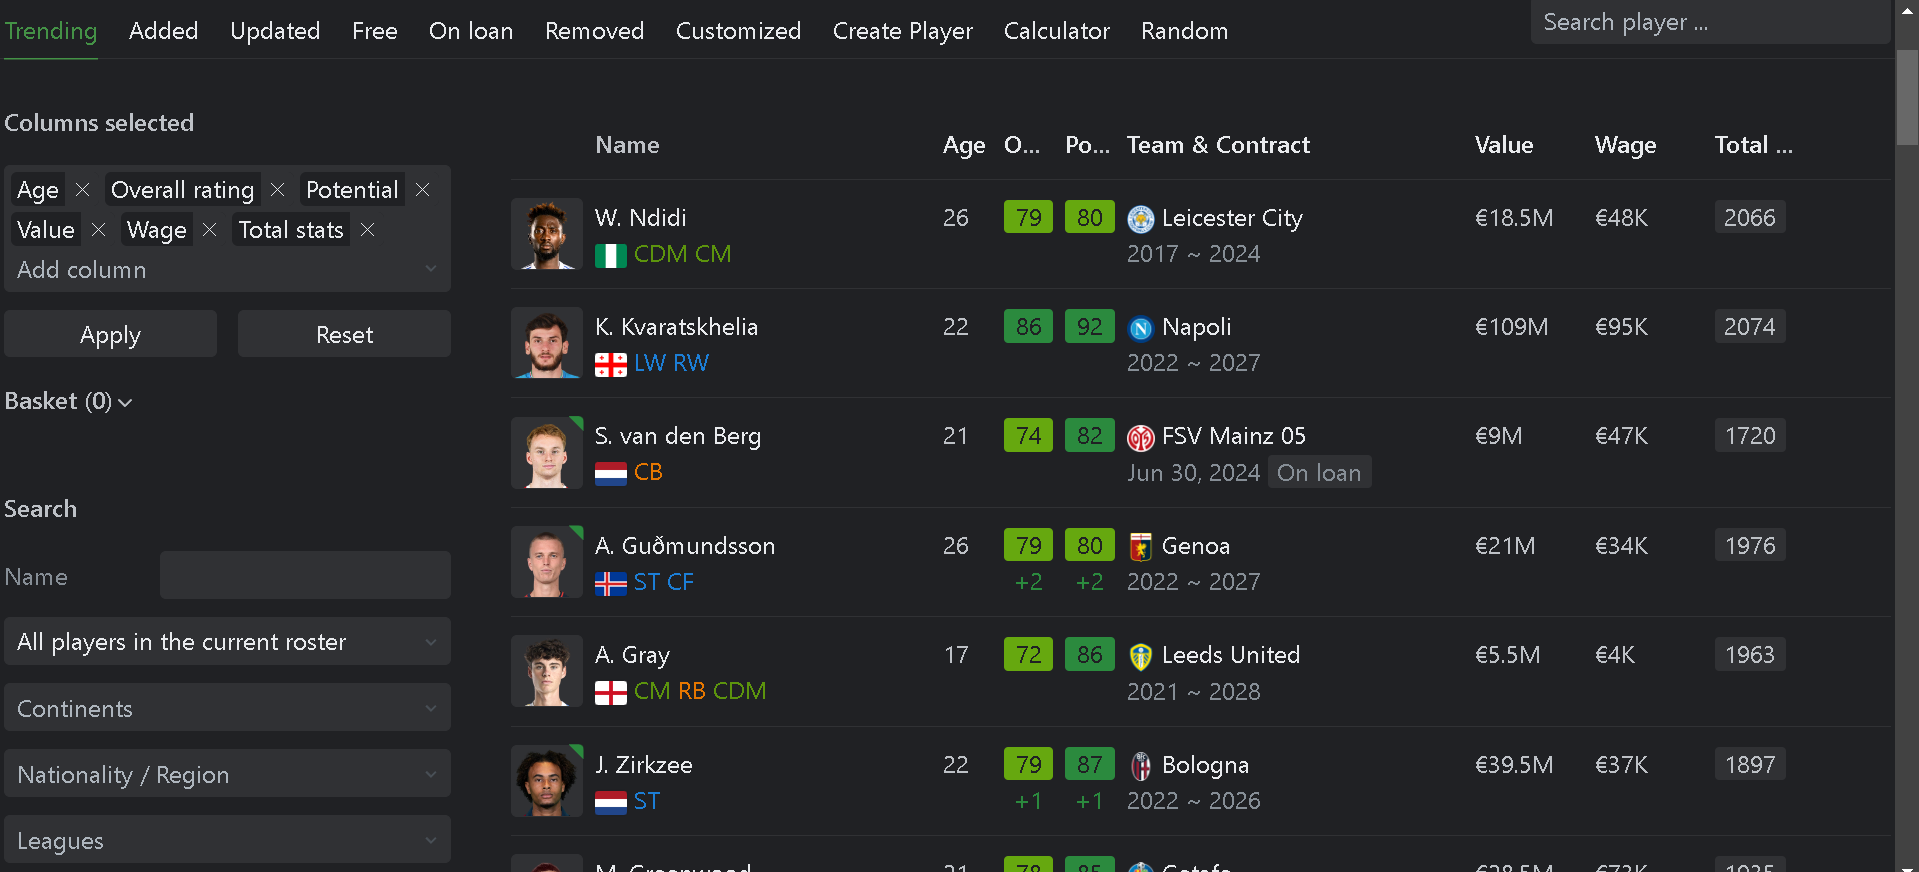

### Parte 1: Librerias utilizadas y elementos basicos para el proyecto.

In [3]:
#Código
from selenium import webdriver
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time
import pandas as pd
from selenium.webdriver.firefox.options import Options
import numpy as np

#Numero de ciclos es = al numero de paginas
ciclos = 1

#Numero de rango representa la pagina a navegar se maneja por 0 y multiplos de 60, ej. 60, 120, 180, 240, 300, etc...
rango = 0

#Se crean los arreglos con los que crearemos el diccionario.
valor = []
equipo = []
potencial = []
rendimientoGeneral = []
edad = []    
nombre = []


# <title> Proyecto tema 3 </title>

### Parte 2: Haciendo la peticion al servidor y acomodando la informacion.

In [4]:

#Este while visita la pagina y obtiene los datos y los vacia en los arreglos previamente creados.
while rango<=1800:#maximo18120
    url = "https://sofifa.com/players?col=oa&sort=desc&offset="+ str(rango)
    print("Haciendo peticion a: " + url)
    # Inicia el navegador web
    options = Options()
    options.add_argument('--headless')

    driver = webdriver.Chrome(options=options)  

    # Navega a la página web
    driver.get(url)

    # Espera a que se carguen los datos
    time.sleep(5)

    # Obtiene el contenido de la página web
    html = driver.page_source

    # Cierra el navegador web
    driver.quit()

    # Parsea el contenido de la página web
    soup = BeautifulSoup(html.encode('utf-8'), 'html.parser')



    # Busca la los elementos dentro de la tabla

    nombres = soup.find('table').find_all('a',href=lambda href: href and '/player/' in href)

    edades = soup.find('table').find_all('td',class_="d2",attrs={'data-col': 'ae'})

    rendimientosGenerales = soup.find('table').find_all('td',class_="d2",attrs={'data-col': 'oa'})

    potenciales = soup.find('table').find_all('td',class_="d2",attrs={'data-col': 'pt'})

    
    tabla = soup.find('table')

    #Este "find_all" busca todas las etiquetas <a> en donde se encuentra el equipo del jugador, en caso de no
        #pertenecer a ningun equipo, busca un valor para poner en ese campo, en este caso, su nacionalidad.
    sinequipo = tabla.find_all(lambda tag: tag.name == 'a' and ('/team/' in tag.get('href', '') or ('nofollow' in tag.get('rel','') and '/players?na' in tag.get('href', ''))))

    valores = soup.find('table').find_all('td',class_="d6",attrs={'data-col': 'vl'})
  

    for row in sinequipo:
        if row.text:
            equipo.append(row.text)
        else:
            print("No hay texto")
            equipo.append(row.get('title'))
        
    for row in valores:
        valor.append(row.text)
        
    for row in potenciales:
        potencial.append(row.text)

    for row in rendimientosGenerales:
        rendimientoGeneral.append(row.text)

    for row in edades:
        edad.append(row.text)

    for row in nombres:
        nombre.append(row.text)

    print("Ciclo "+str(ciclos)+" completado")

    rango = rango + 60
    ciclos = ciclos + 1

Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=0
Ciclo 1 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=60
Ciclo 2 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=120
Ciclo 3 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=180
Ciclo 4 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=240
Ciclo 5 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=300
Ciclo 6 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=360
Ciclo 7 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=420
Ciclo 8 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=480
Ciclo 9 completado
Haciendo peticion a: https://sofifa.com/players?col=oa&sort=desc&offset=540
No hay texto
No hay texto
Ciclo 10 completado
Haciendo peticion a: https

### Parte 3: Creacion del dataframe y eliminar elementos duplicados

In [5]:

#Se crea el diccionario con los arreglos
tablita = {
    "Nombre" : nombre,
    "Edad" : edad,
    "Equipo" : equipo,
    "Rendimiento" : rendimientoGeneral,
    "Potencial" : potencial,
    "Valor en el mercado" : valor
}

#Se crea el datrafrom a partir del diccionario
dataFrame= pd.DataFrame.from_dict(tablita, orient='index')
dataFrame = dataFrame.transpose()

#Se deshechan los renglones duplicados
df_sin_duplicados = dataFrame.drop_duplicates()

#Se imprime el dataframe
print(df_sin_duplicados)

#Se guarda como csv
nombre_archivo = "JugadoresMayorMenos.csv"
df_sin_duplicados.to_csv(nombre_archivo, index=False, encoding='utf-8-sig')

               Nombre Edad                  Equipo Rendimiento Potencial  \
0          E. Haaland   22         Manchester City          91        94   
1           K. Mbappé   24     Paris Saint Germain          91        94   
2        K. De Bruyne   32         Manchester City          91        91   
3               Rodri   27         Manchester City          90        92   
4             H. Kane   29       FC Bayern München          90        90   
...               ...  ...                     ...         ...       ...   
1855       J. Sánchez   25                   Porto          74        76   
1856  S. van den Berg   21            FSV Mainz 05        74+1        82   
1857       J. Denayer   28                Al Fateh          74        75   
1858      Paulo Vítor   34              Al Okhdood          74        74   
1859      E. Ferguson   18  Brighton & Hove Albion          74        86   

     Valor en el mercado  
0                  €185M  
1                €181.5M  
2     

### Parte 4: Importando el dataframe previamente creado.

In [6]:
nombre_archivo = 'JugadoresMayorMenos.csv'

dataframe = pd.read_csv(nombre_archivo)
print(dataframe.head(5))

         Nombre  Edad               Equipo Rendimiento Potencial  \
0    E. Haaland    22      Manchester City          91        94   
1     K. Mbappé    24  Paris Saint Germain          91        94   
2  K. De Bruyne    32      Manchester City          91        91   
3         Rodri    27      Manchester City          90        92   
4       H. Kane    29    FC Bayern München          90        90   

  Valor en el mercado  
0               €185M  
1             €181.5M  
2               €103M  
3             €129.5M  
4             €119.5M  


### Parte 5: Limpieza para crear el Grafico #1

In [7]:
print("ANTES")
print(dataframe['Valor en el mercado'].head(3))

# Reemplazar "M" por una cadena vacía ''
dataframe['Valor en el mercado'] = dataframe['Valor en el mercado'].str.replace('M', '')
# Quitar los renglones con la letra K en la columna de Valor en el mercado
dataframe = dataframe[~dataframe['Valor en el mercado'].str.contains('K')]
# Reemplazar "€" por una cadena vacía '' y luego convertir a tipo float
dataframe['Valor en el mercado'] = dataframe['Valor en el mercado'].str.replace('€', '').astype(float)

print(" \nDESPUES :D")
print(dataframe['Valor en el mercado'].head(3))

ANTES
0      €185M
1    €181.5M
2      €103M
Name: Valor en el mercado, dtype: object
 
DESPUES :D
0    185.0
1    181.5
2    103.0
Name: Valor en el mercado, dtype: float64


### Parte 5.1: Sacar el promedio de la columna 'Valor en el mercado' pero no de forma general sino para cada equipo y mostrar los 10 mas grandes

In [8]:
#Se crea un df nuevo con groupby, este sera un dataframe de una columna unica que contendra
# el promedio de valor de la plantilla de cada club y la ordenaremos de manera descendente
valor_promedio_por_equipo = dataframe.groupby('Equipo')['Valor en el mercado'].mean()
valor_promedio_por_equipo = valor_promedio_por_equipo.sort_values(ascending=False)

#Ahora obtener 2 columnas para poder creaer nuestra grafica
nuevo_dataframe = valor_promedio_por_equipo.reset_index()
nuevo_dataframe.columns = ['Equipo', 'Valor Total Mercado']
nuevo_dataframe = nuevo_dataframe.head(10)
print(nuevo_dataframe.head(3))

            Equipo  Valor Total Mercado
0  Manchester City            62.473684
1      Real Madrid            52.000000
2     FC Barcelona            51.368421


### Parte 5.2: Creacion del grafico 1.

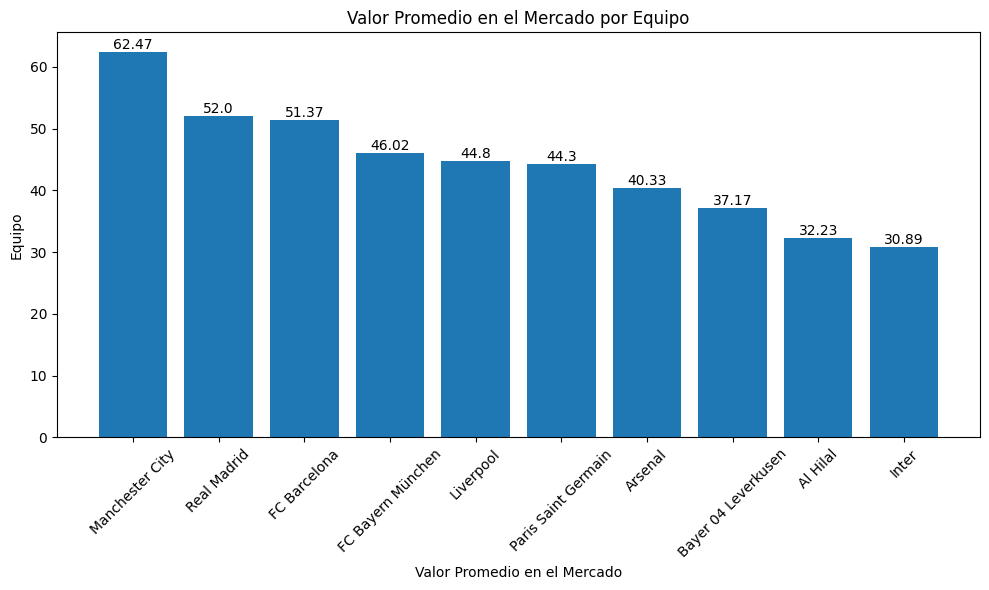

In [9]:
# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
bars = plt.bar(nuevo_dataframe['Equipo'], nuevo_dataframe['Valor Total Mercado'])
plt.xlabel('Valor Promedio en el Mercado')
plt.ylabel('Equipo')
plt.title('Valor Promedio en el Mercado por Equipo')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Agregar los valores exactos sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()  # Ajustar la disposición para evitar superposiciones
plt.show()

### Parte 6: Grafico #2 (con las columnas 'Equipo' y 'Rendimiento'), representando las expresiones matematicas

In [10]:
dataframe_rendimiento = dataframe
#Primero calcular si es necesario (algunas columnas contienen por ejemplo 88 + 1)
dataframe_rendimiento['Rendimiento'] = dataframe_rendimiento['Rendimiento'].apply(lambda x: eval(x))

#Despues pasar los valores de la columna 'Rendimiento' a tipo int
#dataframe_rendimiento['Rendimiento'] = dataframe_rendimiento['Rendimiento'].astype(int)

#Ahora filtrar la columna rendimiento y mostrar solo los mayores o iguales a 85
dataframe_rendimiento = dataframe_rendimiento[dataframe_rendimiento['Rendimiento'] >= 85]
# Imprimir el nuevo DataFrame con los jugadores con rendimiento arriba de 85
print(dataframe_rendimiento.head(3))


         Nombre  Edad               Equipo  Rendimiento Potencial  \
0    E. Haaland    22      Manchester City           91        94   
1     K. Mbappé    24  Paris Saint Germain           91        94   
2  K. De Bruyne    32      Manchester City           91        91   

   Valor en el mercado  
0                185.0  
1                181.5  
2                103.0  


### Parte 6.1: Filtrando los resultados, solo los que tengas 85 o mas

            Equipo  Jugadores Arriba de 85
0      Real Madrid                      10
1  Manchester City                       9
2     FC Barcelona                       8


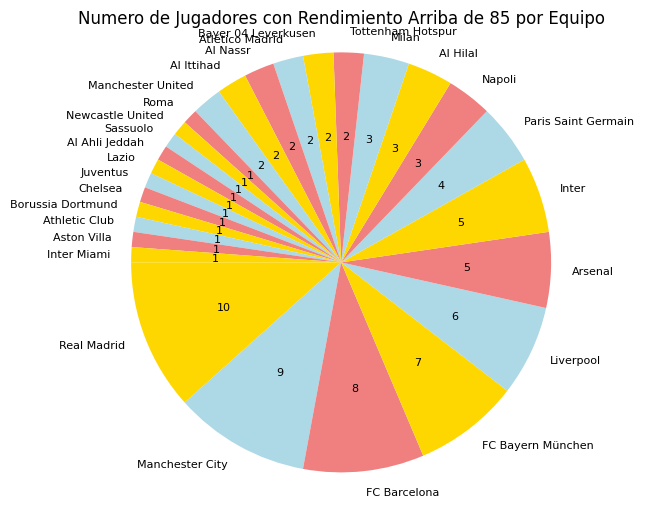

In [11]:
masde85porequipo = dataframe_rendimiento.groupby('Equipo')['Rendimiento'].count()
# Renombrar la columna 'Nombre' a 'JugadoresArribaDe85'
masde85porequipo = masde85porequipo.sort_values(ascending=False)
masde85porequipo.columns = ['Equipo', 'JugadoresArribaDe85']
masde85porequipo = masde85porequipo.reset_index()
masde85porequipo.columns = ['Equipo', 'Jugadores Arriba de 85']
# Imprimir el resultado
print(masde85porequipo.head(3))

sizes = masde85porequipo['Jugadores Arriba de 85']
labels = masde85porequipo['Equipo']
colors = ['gold', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # Separa el primer slice (Equipo A)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors,textprops={'fontsize' : 8}, autopct=lambda p: '{:.0f}'.format(p * sum(sizes) / 100), startangle=180)
plt.title('Numero de Jugadores con Rendimiento Arriba de 85 por Equipo')
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

### Parte 7: Grafico #3

         Nombre  Edad               Equipo Rendimiento Potencial  \
0    E. Haaland    22      Manchester City          91        94   
1     K. Mbappé    24  Paris Saint Germain          91        94   
2  K. De Bruyne    32      Manchester City          91        91   
3         Rodri    27      Manchester City          90        92   
4       H. Kane    29    FC Bayern München          90        90   

  Valor en el mercado  
0               €185M  
1             €181.5M  
2               €103M  
3             €129.5M  
4             €119.5M  


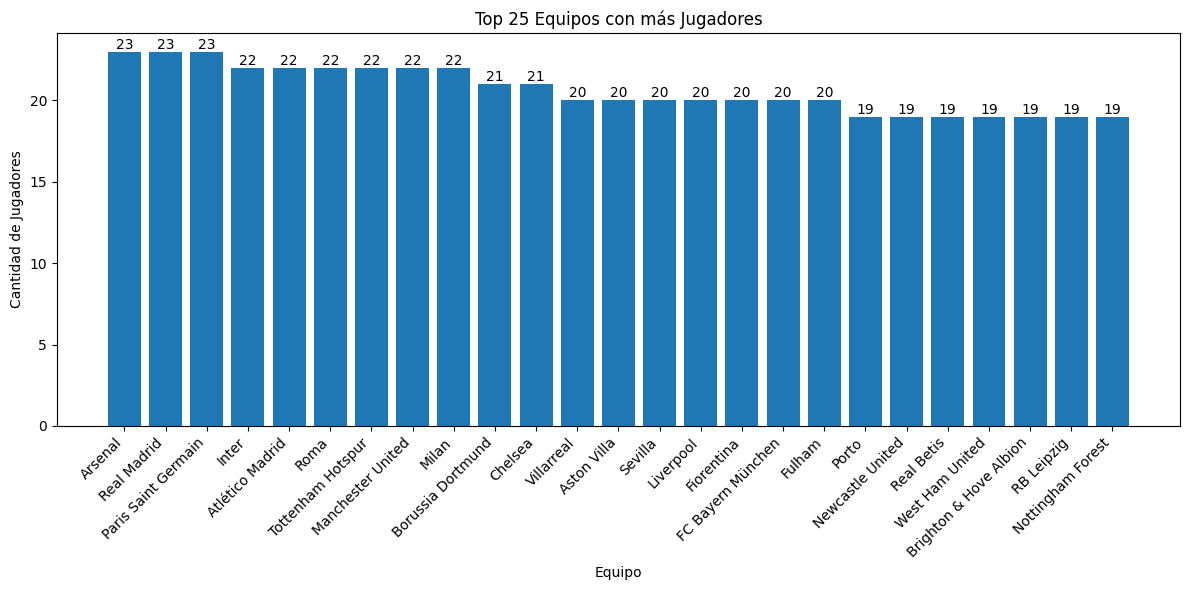

In [12]:

nombre_archivo = 'JugadoresMayorMenos.csv'

dataframe = pd.read_csv(nombre_archivo)
print(dataframe.head(5))

# Contar la cantidad de jugadores por equipo
jugadores_por_equipo = dataframe['Equipo'].value_counts()

# Seleccionar los 25 primeros equipos con más jugadores
top_25_equipos = jugadores_por_equipo.head(25)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
bars = plt.bar(top_25_equipos.index, top_25_equipos.values)
plt.xlabel('Equipo')
plt.ylabel('Cantidad de Jugadores')
plt.title('Top 25 Equipos con más Jugadores')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x y alinearlas a la derecha
plt.subplots_adjust(bottom=0.2)  # Aumentar el espacio entre las etiquetas y el borde inferior

# Agregar los valores exactos sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()  # Ajustar la disposición para evitar superposiciones
plt.show()

### Parte 8: Grafico #4

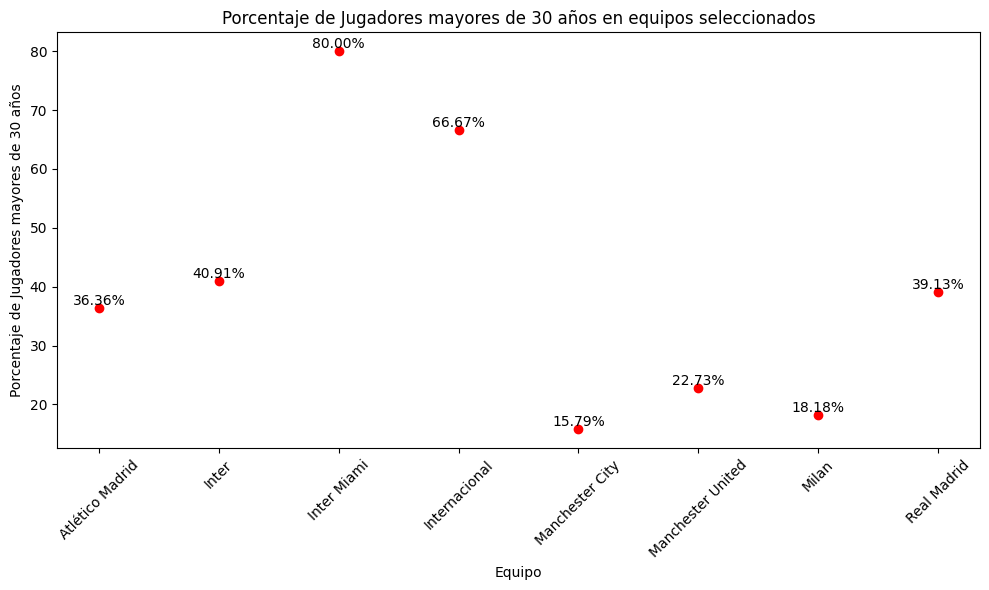

In [13]:

# Cargar el DataFrame con la información de los jugadores desde un archivo CSV
nombre_archivo = 'JugadoresMayorMenos.csv'
jugadores = pd.read_csv(nombre_archivo)

# Filtrar los jugadores que tienen 30 años o más y pertenecen a los equipos de Manchester, Milan, Madrid y Munich
equipos_interes = ['Manchester', 'Milan', 'Madrid', 'Munich', 'Inter']
jugadores_interes = jugadores[jugadores['Equipo'].str.contains('|'.join(equipos_interes), case=False)]
jugadores_mayores_30 = jugadores_interes[jugadores_interes['Edad'] >= 30]

# Calcular el porcentaje de jugadores mayores de 30 años por equipo
porcentaje_jugadores_mayores_30 = (jugadores_mayores_30.groupby('Equipo').size() / jugadores_interes.groupby('Equipo').size()) * 100

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(porcentaje_jugadores_mayores_30.index, porcentaje_jugadores_mayores_30.values, color='red')
plt.xlabel('Equipo')
plt.ylabel('Porcentaje de Jugadores mayores de 30 años')
plt.title('Porcentaje de Jugadores mayores de 30 años en equipos seleccionados')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Agregar los valores exactos sobre los puntos
for i, txt in enumerate(porcentaje_jugadores_mayores_30.values):
    plt.text(i, txt, f'{txt:.2f}%', va='bottom', ha='center')

plt.tight_layout()
plt.show()

### Parte 9: Grafico #5

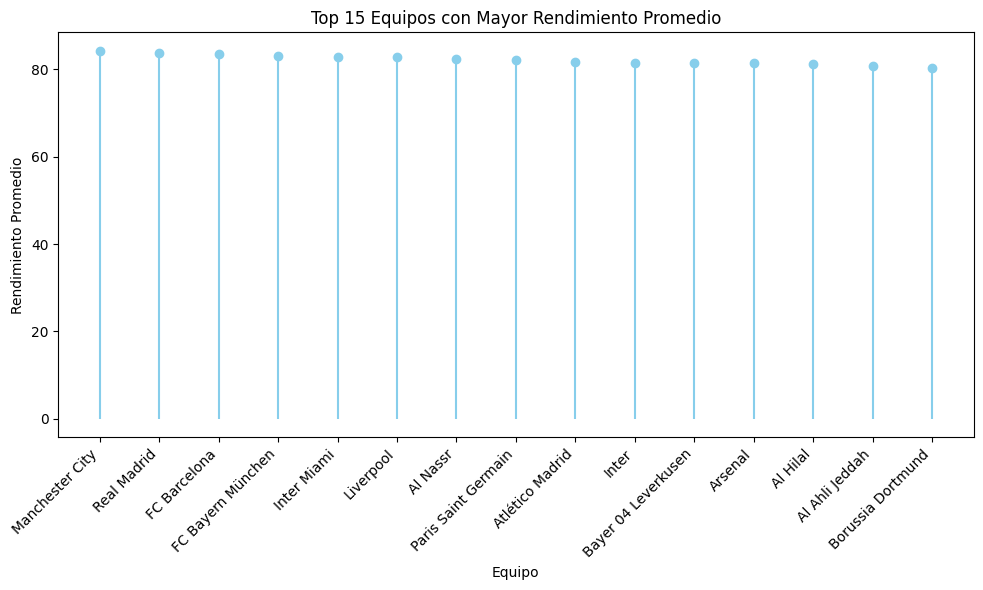

In [14]:
# Limpiar los datos de la columna 'Rendimiento'
dataframe['Rendimiento'] = pd.to_numeric(dataframe['Rendimiento'], errors='coerce')  # Convertir a numérico

# Calcular el rendimiento promedio por equipo
rendimiento_promedio_por_equipo = dataframe.groupby('Equipo')['Rendimiento'].mean().reset_index()

# Ordenar los equipos por rendimiento promedio y seleccionar los 15 mejores
mejores_15_rendimientos = rendimiento_promedio_por_equipo.nlargest(15, 'Rendimiento')

# Graficar
plt.figure(figsize=(10, 6))
plt.stem(mejores_15_rendimientos['Equipo'], mejores_15_rendimientos['Rendimiento'], linefmt='skyblue', markerfmt='o', basefmt=' ')
plt.title('Top 15 Equipos con Mayor Rendimiento Promedio')
plt.xlabel('Equipo')
plt.ylabel('Rendimiento Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Parte 10: Grafico #6

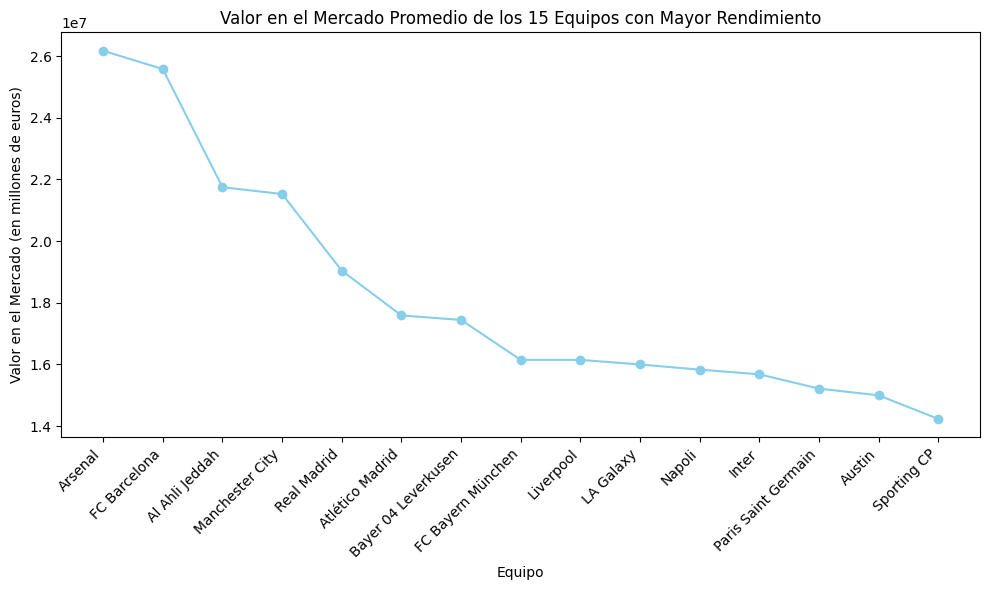

In [15]:

nombre_archivo = 'JugadoresMayorMenos.csv'

dataframe = pd.read_csv(nombre_archivo)

# Reemplazar "M" por el valor numérico correspondiente
dataframe['Valor en el mercado'] = dataframe['Valor en el mercado'].str.replace('M', '000000')

# Reemplazar "K" por el valor numérico correspondiente (dividir por 1000)
dataframe['Valor en el mercado'] = dataframe['Valor en el mercado'].str.replace('K', '000')

# Reemplazar "€" por una cadena vacía '' y luego convertir a tipo float
dataframe['Valor en el mercado'] = dataframe['Valor en el mercado'].str.replace('€', '').astype(float)

# Calcular el valor en el mercado promedio por equipo
valor_promedio_por_equipo = dataframe.groupby('Equipo')['Valor en el mercado'].mean().reset_index()

# Ordenar los equipos por rendimiento promedio y seleccionar los 15 mejores
mejores_15_rendimientos = valor_promedio_por_equipo.nlargest(15, 'Valor en el mercado')

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(mejores_15_rendimientos['Equipo'], mejores_15_rendimientos['Valor en el mercado'], marker='o', color='skyblue', linestyle='-')
plt.title('Valor en el Mercado Promedio de los 15 Equipos con Mayor Rendimiento')
plt.xlabel('Equipo')
plt.ylabel('Valor en el Mercado (en millones de euros)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Parte 11: Grafico #7

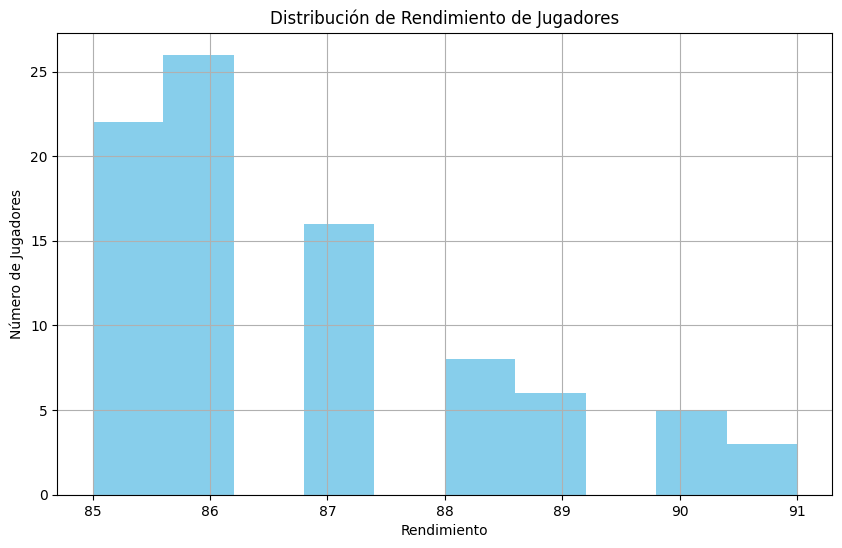

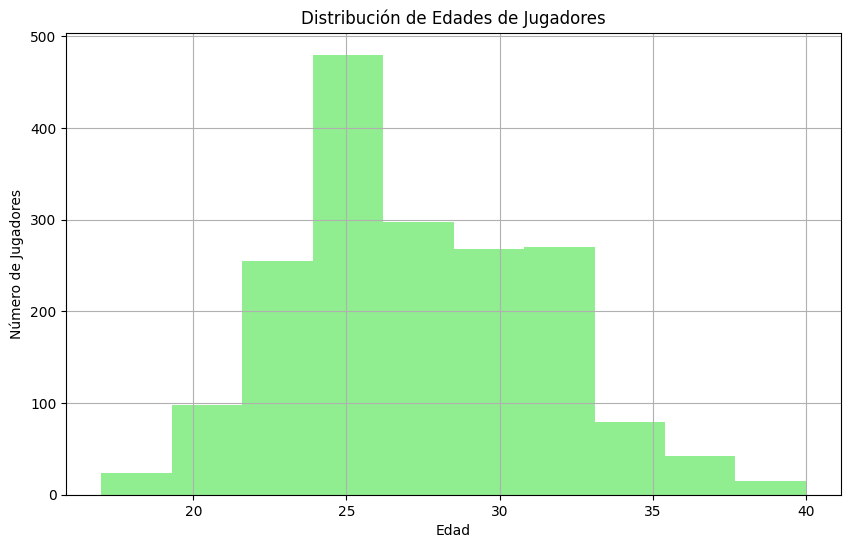

In [16]:
# Convertir la columna 'Rendimiento' a tipo numérico
dataframe['Rendimiento'] = dataframe['Rendimiento'].apply(lambda x: eval(x))

# Filtrar jugadores con rendimiento mayor o igual a 85
dataframe_rendimiento = dataframe[dataframe['Rendimiento'] >= 85]

# Graficar el rendimiento de los jugadores
plt.figure(figsize=(10, 6))
plt.hist(dataframe_rendimiento['Rendimiento'], bins=10, color='skyblue')
plt.title('Distribución de Rendimiento de Jugadores')
plt.xlabel('Rendimiento')
plt.ylabel('Número de Jugadores')
plt.grid(True)
plt.show()

# Graficar la edad de los jugadores
plt.figure(figsize=(10, 6))
plt.hist(dataframe['Edad'], bins=10, color='lightgreen')
plt.title('Distribución de Edades de Jugadores')
plt.xlabel('Edad')
plt.ylabel('Número de Jugadores')
plt.grid(True)
plt.show()

### Parte 12: Grafico #8

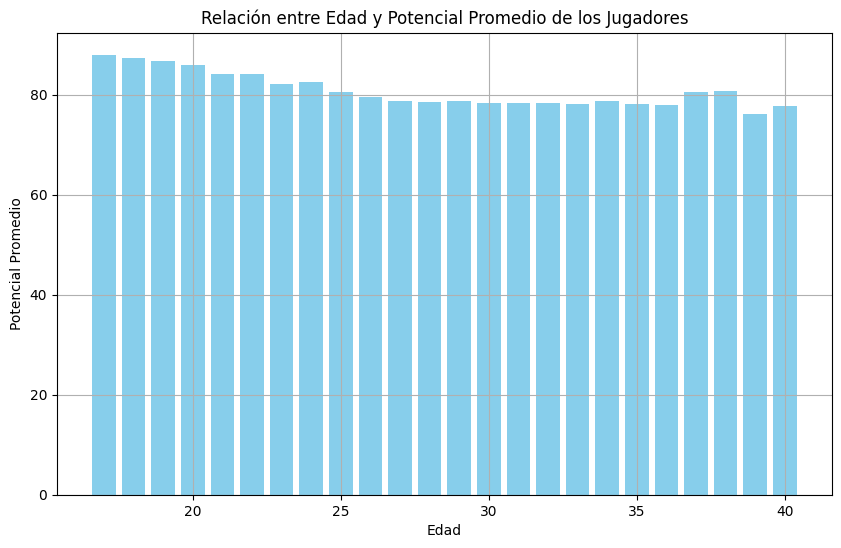

c:\Python312\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


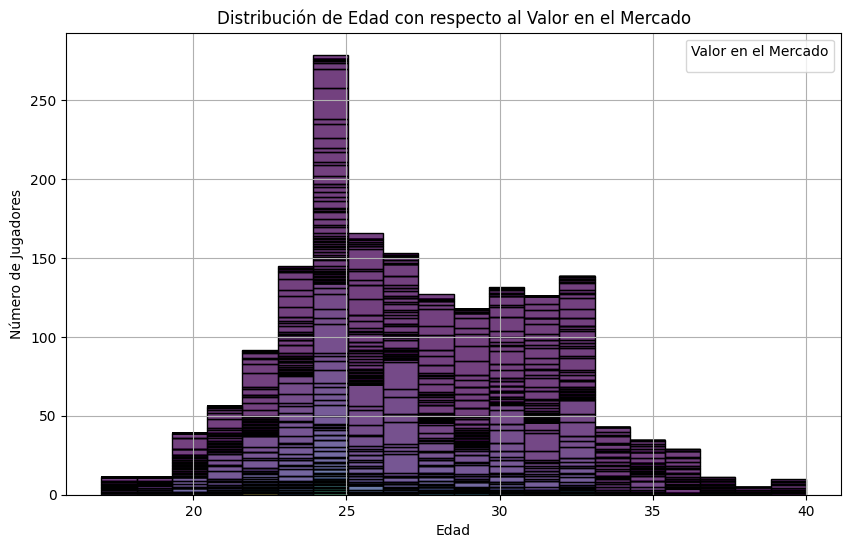

In [17]:
import seaborn as sns

# Convertir la columna 'Potencial' a tipo numérico
dataframe['Potencial'] = pd.to_numeric(dataframe['Potencial'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Potencial'
dataframe.dropna(subset=['Potencial'], inplace=True)

# Calcular la media del potencial para cada grupo de edad
potencial_por_edad = dataframe.groupby('Edad')['Potencial'].mean().reset_index()

# Graficar la relación entre la edad y la media del potencial
plt.figure(figsize=(10, 6))
plt.bar(potencial_por_edad['Edad'], potencial_por_edad['Potencial'], color='skyblue')
plt.title('Relación entre Edad y Potencial Promedio de los Jugadores')
plt.xlabel('Edad')
plt.ylabel('Potencial Promedio')
plt.grid(True)
plt.show()


# Gráfico de histograma para la distribución de la edad con diferentes colores para diferentes rangos de valor en el mercado
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Edad', hue='Valor en el mercado', palette='viridis', multiple='stack', bins=20)
plt.title('Distribución de Edad con respecto al Valor en el Mercado')
plt.xlabel('Edad')
plt.ylabel('Número de Jugadores')
plt.legend(title='Valor en el Mercado')
plt.grid(True)
plt.show()